# Part 1: Clustering the Manufacturing Data

## Task 1. Preparing data for clustering

- Location Number         : Numerical code for the store (unique identifier)
- DEALER CODE             : Text identifier for the store(unique identifier)
- REPORT DATE             : Date of the data extraction
- HATCH                   : Number of hatch back model cars sold by the store
- SEDAN                   : Number of sedan model cars sold by the store
- WAGON                   : Number of station wagon model cars sold by the store
- UTE                     : Number of utility / tray back model cars sold by the store
- K_SALES_TOT             : Total sales for the store($$$)

In [1]:
#Input dataset
import pandas as pd
import numpy as np

df = pd.read_csv('Stephen/Case Study 2/datasets/model_car_sales.csv', na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                675 non-null object
HATCH              675 non-null object
WAG0N              675 non-null object
SEDAN              675 non-null object
K__SALES_TOT       675 non-null object
dtypes: int64(1), object(7)
memory usage: 42.3+ KB


The output listed `UTE`, `HATCH`, `WAGON`, `SEDAN` as objects, while based on the dataset description given above, they should all be numerical variables.

In [2]:
# get more information from HATCH
print(df['HATCH'].describe())
print(df['HATCH'].value_counts().nlargest(5))

# get more information from WAG0N
print(df['WAG0N'].describe())
print(df['WAG0N'].value_counts().nlargest(5))

# get more information from SEDAN
print(df['SEDAN'].describe())
print(df['SEDAN'].value_counts().nlargest(5))

# get more information from UTE
print(df['UTE'].describe())
print(df['UTE'].value_counts().nlargest(5))

count     675
unique    518
top          
freq       22
Name: HATCH, dtype: object
        22
2093     4
1724     4
1738     4
1607     3
Name: HATCH, dtype: int64
count     675
unique    426
top          
freq       22
Name: WAG0N, dtype: object
       22
442     5
382     5
410     4
319     4
Name: WAG0N, dtype: int64
count     675
unique    501
top          
freq       22
Name: SEDAN, dtype: object
        22
1870     5
1940     4
1655     4
1798     3
Name: SEDAN, dtype: int64
count     675
unique    143
top          
freq       22
Name: UTE, dtype: object
      22
92    15
81    15
80    12
90    12
Name: UTE, dtype: int64


So the cause of the incorrect type is each value has 22 empty strings in this Series.

In [3]:
# replace the empty strings in the series with nan and typecast to float
df['HATCH'] = df['HATCH'].replace('', np.nan).astype(float)
df['WAG0N'] = df['WAG0N'].replace('', np.nan).astype(float)
df['SEDAN'] = df['SEDAN'].replace('', np.nan).astype(float)
df['UTE'] = df['UTE'].replace('', np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                653 non-null float64
HATCH              653 non-null float64
WAG0N              653 non-null float64
SEDAN              653 non-null float64
K__SALES_TOT       675 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 42.3+ KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

UTE_dist = sns.distplot(df['UTE'].dropna())
plt.show()

HATCH_dist = sns.distplot(df['HATCH'].dropna())
plt.show()

WAG0N_dist = sns.distplot(df['WAG0N'].dropna())
plt.show()

SEDAN_dist = sns.distplot(df['SEDAN'].dropna())
plt.show()

In [5]:
print (df.isnull().sum())

LOCATION_NUMBER     0
REPORT_DATE         0
DEALER_CODE         0
UTE                22
HATCH              22
WAG0N              22
SEDAN              22
K__SALES_TOT        0
dtype: int64


As shown above, each value has 22 missing records. There is a chance that these missing records are in the same row. We could removing missing records of one value, then see if there is any missing records in all values.

In [5]:
# before
print("Row # before dropping errorneous rows", len(df))

#drop rows with UTE values that are missing
df = df[df['UTE'].notnull()]

# after
print("Row # after dropping errorneous rows", len(df))

print (df.isnull().sum())

Row # before dropping errorneous rows 675
Row # after dropping errorneous rows 653
LOCATION_NUMBER    0
REPORT_DATE        0
DEALER_CODE        0
UTE                0
HATCH              0
WAG0N              0
SEDAN              0
K__SALES_TOT       0
dtype: int64


We can see these missing records were in the same row, and now are all removed.

## Task 2. The first clustering model

In [6]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df2 = df[['HATCH', 'WAG0N', 'SEDAN']]

# convert df2 to matrix
X = df2.as_matrix()
X

array([[1513., 1132., 1744.],
       [1841.,  220., 2296.],
       [1923.,  557., 1772.],
       ...,
       [2234.,  351., 1733.],
       [1553.,  925., 1882.],
       [2485.,  367., 1595.]])

### 1. The default clustering model with K = 3 (Without standardization)

Sum of intra-cluster distance: 75716679.81794661
Centroid locations:
[1522.58   79.52 1508.62]
[1702.05572755  534.9876161  2063.35603715]
[2228.57142857  411.10714286 1666.83928571]
Cluster membership
1    322
2    281
0     50
Name: Cluster_ID, dtype: int64


/Users/Steve/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


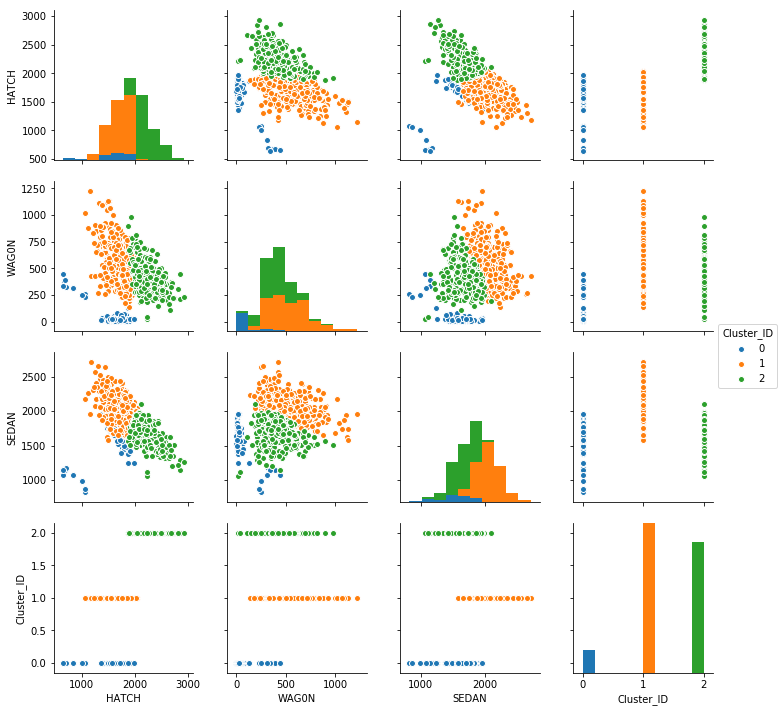

In [7]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

### 2. The clustering model with standardization method

In [8]:
# Normalization process
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13910245,  3.23295528, -0.36866443],
       [-0.20754921, -1.07132041,  1.53576542],
       [ 0.0253391 ,  0.51918497, -0.27206292],
       ...,
       [ 0.90861062, -0.45305274, -0.40661503],
       [-1.0254984 ,  2.25599797,  0.10744303],
       [ 1.62147605, -0.37753913, -0.88272249]])

Sum of intra-cluster distance: 954.6325835439618
Centroid locations:
[-0.34970182 -0.45260326  0.7935408 ]
[ 0.86563189 -0.38489507 -0.83804699]
[-0.84831714  1.22340055  0.1881452 ]
Cluster membership
1    256
0    231
2    166
Name: Cluster_ID, dtype: int64


/Users/Steve/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


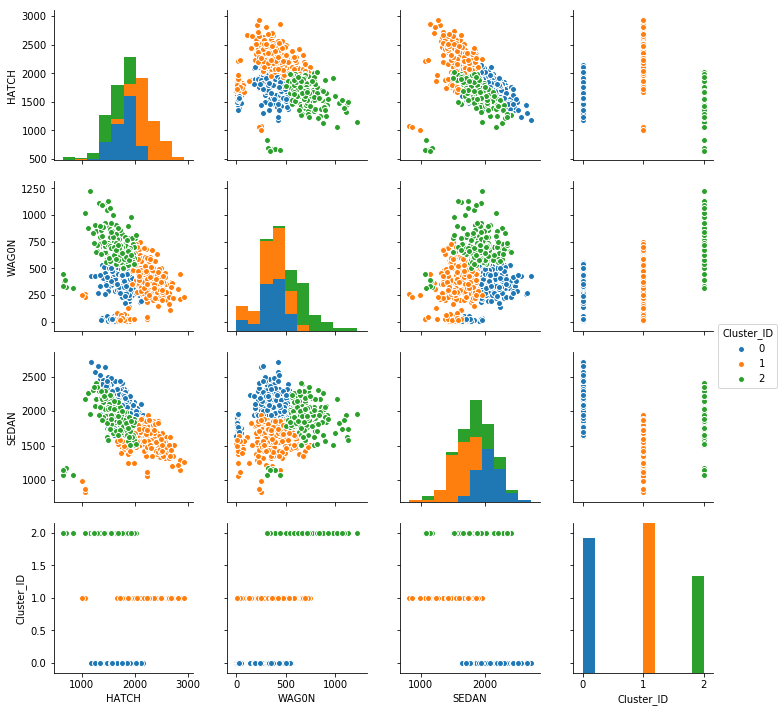

In [9]:
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()


## Task 3. Refinin the clustering model

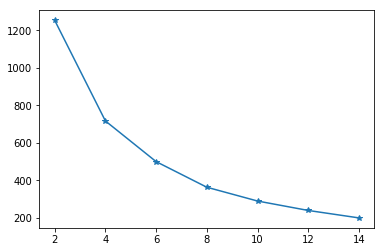

In [10]:
############# Elbow ################
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [11]:
####### silhouette_score

from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.3708685914944794
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.3577177137614231


Sum of intra-cluster distance: 716.2301779055831
Centroid locations:
[-0.29637627 -0.2781499   0.87351115]
[ 0.99997728 -0.1938563  -0.73224141]
[-0.79770269  1.36311464  0.29883776]
[-1.03516567 -1.74277435 -1.23655208]
Cluster membership
1    235
0    221
2    145
3     52
Name: Cluster_ID, dtype: int64


/Users/Steve/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


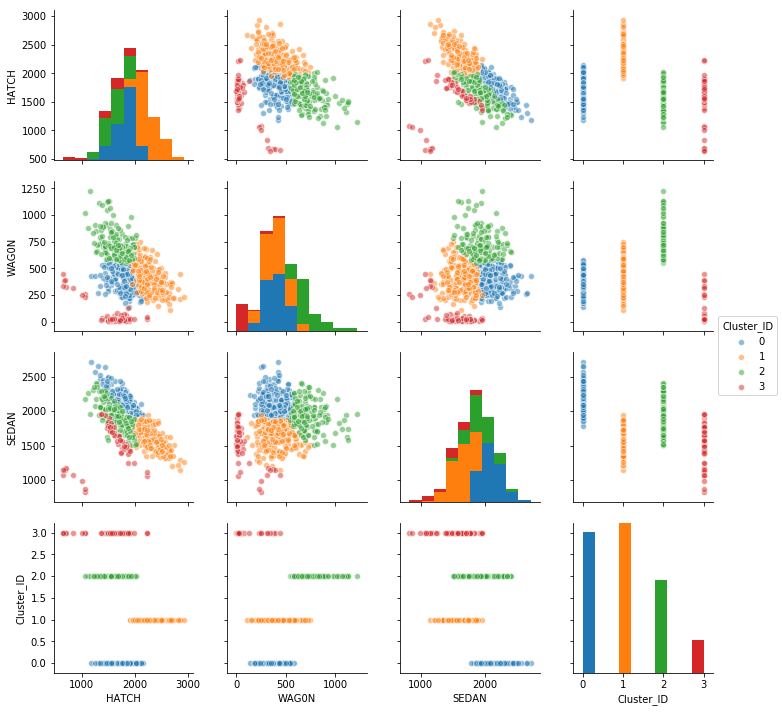

In [14]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show()